In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [32]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Prepare dataset

#### Preprocessing (Dealing with missing data)

In [33]:
# Filling missing values with mean
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

train_df.dropna(axis=0, subset=["Survived"], inplace=True)
train_df.dropna(axis=0, subset=["Age"], inplace=True)

#### Feature Engineering (Labeling categorical data)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

train_df["Sex"] = le.fit_transform(train_df["Sex"])
test_df["Sex"] = le.fit_transform(test_df["Sex"])

#### Spliting dataset

In [35]:
# Selecting features
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

y = train_df["Survived"]

In [36]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1, test_size=0.2)

#### Make predictions using Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)
model_forest.fit(X_train, y_train)

model_forest.score(X_valid, y_valid)

0.8391608391608392

#### Make predictions using Single Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=1)
model_tree.fit(X_train, y_train)

model_tree.score(X_valid, y_valid)

0.7902097902097902

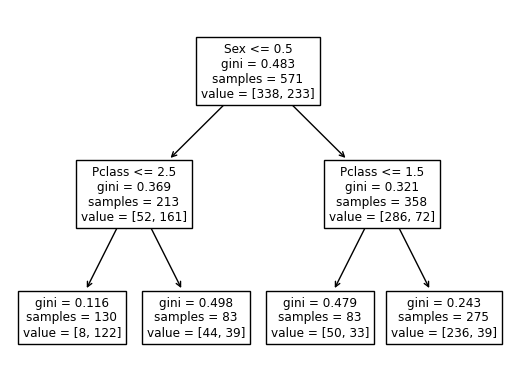

In [56]:
# Plotting Tree
from sklearn import tree
tree.plot_tree(model_tree, feature_names=list(X_train.columns))
plt.show()